In [1]:
from qutip.qip.models.optpulseprocessor import *
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

The demo in this notebook is based on the branch https://github.com/BoxiLi/qutip/tree/circuitprocessor

In this example, we use `OptPulseProcessor` to find the optmal control pulse of a multiqubits circuit. For simplicity, the circuit contains only one toffoli gate.

In [2]:
toffoli()

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]

We have single qubit control $\sigma_x$ and $\sigma_z$, with the argument `expand_type="periodic"`, it creates 3 operators each targeted on one qubit.

In [3]:
N = 3
H_d = tensor([identity(2)]*3)
test_processor = OptPulseProcessor(N, H_d, [])
test_processor.add_ctrl(sigmaz(), expand_type="periodic")
test_processor.add_ctrl(sigmax(), expand_type="periodic")

The interaction is generated by $\sigma_x\sigma_x$ between the qubit 0 & 1 and qubit 1 & 2. `expand_oper` can be used to expand the operator to a larger dimension with given target qubits.

In [4]:
sxsx = tensor([sigmax(),sigmax()])
sxsx01 = expand_oper(sxsx, N=3, targets=[0,1])
sxsx12 = expand_oper(sxsx, N=3, targets=[1,2])
test_processor.add_ctrl(sxsx01)
test_processor.add_ctrl(sxsx12)

Find the optimal pulse with 6 time slots. Instead of a `QubitCircuit`, a list of operators can also be given as an input.

********** Gate 0 **********
Final fidelity error 7.153721948149894e-09
Final gradient normal 1.0565633523612876e-05
Terminated due to function converged
Number of iterations 343


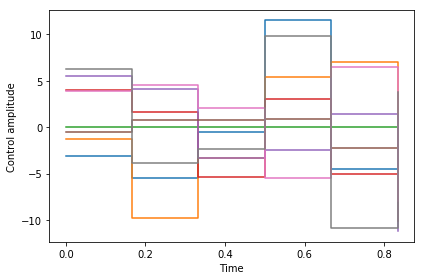

In [5]:
test_processor.load_circuit([toffoli()], n_ts=6, evo_time=1, verbose=True);
test_processor.plot_pulses();

Check the result with random initial state

In [6]:
rho0 = rand_ket(2**N)
rho0.dims = [[2]*N,[1]]
result = test_processor.run_state(rho0=rho0, dt = 0.001)
fidelity(result.states[-1], toffoli()*rho0)

0.9999451184735605